In [1]:
# 1.2 The IMDb Top 250 Movies list:
# https://www.imdb.com/chart/top/
# https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=num_votes,asc


In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup


In [3]:
url = 'https://www.imdb.com/chart/top/'


In [4]:
page = requests.get(url)


In [5]:
soup = BeautifulSoup(page.content, 'html.parser')


In [6]:
soup.title.text.strip()


'Top 250 Movies - IMDb'

In [7]:
# 1. Scrape the movie titles, release years, ratings, and other
# data from the table and store it in a Pandas DataFrame for
# further analysis.


In [8]:
title = soup.find_all('td', {'class': 'titleColumn'})


In [9]:
title_list = []
for value in title:
    title_list.append(value.text.strip().split('.'))


In [10]:
title_list


[['1', '\n      The Shawshank Redemption\n(1994)'],
 ['2', '\n      The Godfather\n(1972)'],
 ['3', '\n      The Dark Knight\n(2008)'],
 ['4', '\n      The Godfather Part II\n(1974)'],
 ['5', '\n      12 Angry Men\n(1957)'],
 ['6', "\n      Schindler's List\n(1993)"],
 ['7', '\n      The Lord of the Rings: The Return of the King\n(2003)'],
 ['8', '\n      Pulp Fiction\n(1994)'],
 ['9', '\n      The Lord of the Rings: The Fellowship of the Ring\n(2001)'],
 ['10', '\n      Il buono, il brutto, il cattivo\n(1966)'],
 ['11', '\n      Forrest Gump\n(1994)'],
 ['12', '\n      Fight Club\n(1999)'],
 ['13', '\n      The Lord of the Rings: The Two Towers\n(2002)'],
 ['14', '\n      Inception\n(2010)'],
 ['15', '\n      The Empire Strikes Back\n(1980)'],
 ['16', '\n      The Matrix\n(1999)'],
 ['17', '\n      GoodFellas\n(1990)'],
 ['18', "\n      One Flew Over the Cuckoo's Nest\n(1975)"],
 ['19', '\n      Se7en\n(1995)'],
 ['20', '\n      Shichinin no samurai\n(1954)'],
 ['21', "\n      It's a 

In [11]:
title_list2 = []
for item in title_list:
    title_list2.append(item[1].strip())


In [12]:
title_list2


['The Shawshank Redemption\n(1994)',
 'The Godfather\n(1972)',
 'The Dark Knight\n(2008)',
 'The Godfather Part II\n(1974)',
 '12 Angry Men\n(1957)',
 "Schindler's List\n(1993)",
 'The Lord of the Rings: The Return of the King\n(2003)',
 'Pulp Fiction\n(1994)',
 'The Lord of the Rings: The Fellowship of the Ring\n(2001)',
 'Il buono, il brutto, il cattivo\n(1966)',
 'Forrest Gump\n(1994)',
 'Fight Club\n(1999)',
 'The Lord of the Rings: The Two Towers\n(2002)',
 'Inception\n(2010)',
 'The Empire Strikes Back\n(1980)',
 'The Matrix\n(1999)',
 'GoodFellas\n(1990)',
 "One Flew Over the Cuckoo's Nest\n(1975)",
 'Se7en\n(1995)',
 'Shichinin no samurai\n(1954)',
 "It's a Wonderful Life\n(1946)",
 'The Silence of the Lambs\n(1991)',
 'Saving Private Ryan\n(1998)',
 'Cidade de Deus\n(2002)',
 'Interstellar\n(2014)',
 'La vita è bella\n(1997)',
 'The Green Mile\n(1999)',
 'Star Wars\n(1977)',
 'Terminator 2: Judgment Day\n(1991)',
 'Back to the Future\n(1985)',
 'Sen to Chihiro no kamikakushi\n

In [13]:
title_list3 = []
for item in title_list2:
    title_list3.append(item.replace('\n', '').replace(')', '').split('('))


In [14]:
title_list3


[['The Shawshank Redemption', '1994'],
 ['The Godfather', '1972'],
 ['The Dark Knight', '2008'],
 ['The Godfather Part II', '1974'],
 ['12 Angry Men', '1957'],
 ["Schindler's List", '1993'],
 ['The Lord of the Rings: The Return of the King', '2003'],
 ['Pulp Fiction', '1994'],
 ['The Lord of the Rings: The Fellowship of the Ring', '2001'],
 ['Il buono, il brutto, il cattivo', '1966'],
 ['Forrest Gump', '1994'],
 ['Fight Club', '1999'],
 ['The Lord of the Rings: The Two Towers', '2002'],
 ['Inception', '2010'],
 ['The Empire Strikes Back', '1980'],
 ['The Matrix', '1999'],
 ['GoodFellas', '1990'],
 ["One Flew Over the Cuckoo's Nest", '1975'],
 ['Se7en', '1995'],
 ['Shichinin no samurai', '1954'],
 ["It's a Wonderful Life", '1946'],
 ['The Silence of the Lambs', '1991'],
 ['Saving Private Ryan', '1998'],
 ['Cidade de Deus', '2002'],
 ['Interstellar', '2014'],
 ['La vita è bella', '1997'],
 ['The Green Mile', '1999'],
 ['Star Wars', '1977'],
 ['Terminator 2: Judgment Day', '1991'],
 ['Bac

In [15]:
df_title = pd.DataFrame(title_list3)


In [16]:
df_title


,0,1
0,The Shawshank Redemption,1994
1,The Godfather,1972
2,The Dark Knight,2008
3,The Godfather Part II,1974
4,12 Angry Men,1957
...,...,...
245,Dersu Uzala,1975
246,The Help,2011
247,Aladdin,1992
248,Gandhi,1982


In [17]:
df_title.rename(columns={0: 'Title'}, inplace=True)


In [18]:
df_title


,Title,1
0,The Shawshank Redemption,1994
1,The Godfather,1972
2,The Dark Knight,2008
3,The Godfather Part II,1974
4,12 Angry Men,1957
...,...,...
245,Dersu Uzala,1975
246,The Help,2011
247,Aladdin,1992
248,Gandhi,1982


In [19]:
df_title.rename(columns={1: 'Year_Released'}, inplace=True)


In [20]:
df_title


,Title,Year_Released
0,The Shawshank Redemption,1994
1,The Godfather,1972
2,The Dark Knight,2008
3,The Godfather Part II,1974
4,12 Angry Men,1957
...,...,...
245,Dersu Uzala,1975
246,The Help,2011
247,Aladdin,1992
248,Gandhi,1982


In [21]:
df_title.set_index('Title', inplace=True)


In [22]:
df_title


,Year_Released
Title,
The Shawshank Redemption,1994
The Godfather,1972
The Dark Knight,2008
The Godfather Part II,1974
12 Angry Men,1957
...,...
Dersu Uzala,1975
The Help,2011
Aladdin,1992


In [23]:
rating = soup.find_all('td', {'class': 'ratingColumn'})

In [24]:
rating_list = []
for value in rating:
    rating_list.append(value.text.strip())


In [25]:
rating_list


['9.2',
 '12345678910 \n\n\n\nNOT YET RELEASED\n \n\nSeen',
 '9.2',
 '12345678910 \n\n\n\nNOT YET RELEASED\n \n\nSeen',
 '9.0',
 '12345678910 \n\n\n\nNOT YET RELEASED\n \n\nSeen',
 '9.0',
 '12345678910 \n\n\n\nNOT YET RELEASED\n \n\nSeen',
 '9.0',
 '12345678910 \n\n\n\nNOT YET RELEASED\n \n\nSeen',
 '8.9',
 '12345678910 \n\n\n\nNOT YET RELEASED\n \n\nSeen',
 '8.9',
 '12345678910 \n\n\n\nNOT YET RELEASED\n \n\nSeen',
 '8.8',
 '12345678910 \n\n\n\nNOT YET RELEASED\n \n\nSeen',
 '8.8',
 '12345678910 \n\n\n\nNOT YET RELEASED\n \n\nSeen',
 '8.8',
 '12345678910 \n\n\n\nNOT YET RELEASED\n \n\nSeen',
 '8.8',
 '12345678910 \n\n\n\nNOT YET RELEASED\n \n\nSeen',
 '8.7',
 '12345678910 \n\n\n\nNOT YET RELEASED\n \n\nSeen',
 '8.7',
 '12345678910 \n\n\n\nNOT YET RELEASED\n \n\nSeen',
 '8.7',
 '12345678910 \n\n\n\nNOT YET RELEASED\n \n\nSeen',
 '8.7',
 '12345678910 \n\n\n\nNOT YET RELEASED\n \n\nSeen',
 '8.7',
 '12345678910 \n\n\n\nNOT YET RELEASED\n \n\nSeen',
 '8.7',
 '12345678910 \n\n\n\nNOT YET RE

In [26]:
rating_list2 = []
for i in range(len(rating_list)):
    if i % 2 == 0:
        rating_list2.append(rating_list[i])


In [27]:
rating_list2


['9.2',
 '9.2',
 '9.0',
 '9.0',
 '9.0',
 '8.9',
 '8.9',
 '8.8',
 '8.8',
 '8.8',
 '8.8',
 '8.7',
 '8.7',
 '8.7',
 '8.7',
 '8.7',
 '8.7',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.4',
 '8.4',
 '8.4',
 '8.4',
 '8.4',
 '8.4',
 '8.4',
 '8.4',
 '8.4',
 '8.4',
 '8.4',
 '8.4',
 '8.4',
 '8.4',
 '8.4',
 '8.4',
 '8.4',
 '8.4',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',


In [28]:
df_title['Ratings'] = rating_list2


In [29]:
df_title


,Year_Released,Ratings
Title,,
The Shawshank Redemption,1994,9.2
The Godfather,1972,9.2
The Dark Knight,2008,9.0
The Godfather Part II,1974,9.0
12 Angry Men,1957,9.0
...,...,...
Dersu Uzala,1975,8.0
The Help,2011,8.0
Aladdin,1992,8.0


In [30]:
# 2. Extract the genres of each movie and create a visualization
# of the most common genres using Pandas and Matplotlib.


In [31]:
url = 'https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=num_votes,asc'


In [32]:
page = requests.get(url)


In [33]:
soup = BeautifulSoup(page.content, 'html.parser')


In [34]:
top_titles = soup.find_all('h3', {'class': 'lister-item-header'})


In [35]:
top_titles_list = []
for value in top_titles:
    top_titles_list.append(value.text.replace('\n', '').strip())


In [36]:
top_titles_list2 = []
for value in top_titles_list:
    top_titles_list2.append(value[2:])


In [37]:
top_titles_list2


['Nowhere to Run(1993)',
 'Stormbreaker(2006)',
 'Muppet Treasure Island(1996)',
 'Agneepath(2012)',
 'Evangelion Shin Gekijôban: Jo(2007)',
 'Koi... Mil Gaya(2003)',
 '2.0(2018)',
 'Crocodile Dundee in Los Angeles(2001)',
 'The Contract(2006)',
 '.Men at Work(1990)',
 '.Død snø 2(2014)',
 '.Gabbar Is Back(2015)',
 '.Eega(2012)',
 '.Close(I) (2019)',
 '.Shotgun Wedding(2022)',
 '.Rangasthalam(2018)',
 '.Universal Soldier: Regeneration(2009)',
 '.Godsend(2004)',
 '.The Shadow(1994)',
 '.The Man(2005)',
 '.Arjun Reddy(2017)',
 '.Sarfarosh(1999)',
 '.Thunivu(2023)',
 '.Rollerball(1975)',
 '.The Adventures of Pluto Nash(2002)',
 '.Taeksi woonjunsa(2017)',
 '.Spy Kids 4: All the Time in the World(2011)',
 '.Thunderbolt and Lightfoot(1974)',
 '.An Action Hero(2022)',
 '.Hamburger Hill(1987)',
 '.The Black Hole(1979)',
 '.Bodyguard(I) (2011)',
 '.Seungriho(2021)',
 '.The Lovebirds(2020)',
 '.Mutant Chronicles(2008)',
 ".The Warrior's Way(2010)",
 '.Jay and Silent Bob Reboot(2019)',
 '.Cooties

In [38]:
df_top_titles = pd.DataFrame(top_titles_list2)


In [39]:
df_top_titles


,0
0,Nowhere to Run(1993)
1,Stormbreaker(2006)
2,Muppet Treasure Island(1996)
3,Agneepath(2012)
4,Evangelion Shin Gekijôban: Jo(2007)
5,Koi... Mil Gaya(2003)
6,2.0(2018)
7,Crocodile Dundee in Los Angeles(2001)
8,The Contract(2006)
9,.Men at Work(1990)


In [40]:
df_top_titles.rename(columns={0 : 'Top_Titles'}, inplace=True)


In [41]:
df_top_titles


,Top_Titles
0,Nowhere to Run(1993)
1,Stormbreaker(2006)
2,Muppet Treasure Island(1996)
3,Agneepath(2012)
4,Evangelion Shin Gekijôban: Jo(2007)
5,Koi... Mil Gaya(2003)
6,2.0(2018)
7,Crocodile Dundee in Los Angeles(2001)
8,The Contract(2006)
9,.Men at Work(1990)


In [42]:
genre = soup.find_all('span', {'class': 'genre'})


In [43]:
genre_list = []
for value in genre:
    genre_list.append(value.text.strip())


In [44]:
genre_list


['Action, Drama, Romance',
 'Action, Adventure, Family',
 'Action, Adventure, Comedy',
 'Action, Crime, Drama',
 'Animation, Action, Drama',
 'Action, Drama, Romance',
 'Action, Sci-Fi, Thriller',
 'Action, Adventure, Comedy',
 'Action, Crime, Drama',
 'Action, Comedy, Crime',
 'Action, Comedy, Fantasy',
 'Action, Crime, Drama',
 'Action, Comedy, Drama',
 'Action, Drama, Thriller',
 'Action, Comedy, Romance',
 'Action, Drama',
 'Action, Adventure, Sci-Fi',
 'Action, Drama, Fantasy',
 'Action, Adventure, Crime',
 'Action, Comedy, Crime',
 'Action, Drama, Romance',
 'Action, Drama, Thriller',
 'Action, Adventure, Thriller',
 'Action, Sci-Fi, Sport',
 'Action, Comedy, Sci-Fi',
 'Action, Drama, History',
 'Action, Adventure, Comedy',
 'Action, Comedy, Crime',
 'Action, Comedy, Crime',
 'Action, Drama, Thriller',
 'Action, Sci-Fi',
 'Action, Comedy, Drama',
 'Action, Adventure, Drama',
 'Action, Comedy, Crime',
 'Action, Adventure, Mystery',
 'Action, Fantasy, Western',
 'Action, Adventure,

In [45]:
df_top_titles['Genres'] = genre_list


In [46]:
df_top_titles


,Top_Titles,Genres
0,Nowhere to Run(1993),"Action, Drama, Romance"
1,Stormbreaker(2006),"Action, Adventure, Family"
2,Muppet Treasure Island(1996),"Action, Adventure, Comedy"
3,Agneepath(2012),"Action, Crime, Drama"
4,Evangelion Shin Gekijôban: Jo(2007),"Animation, Action, Drama"
5,Koi... Mil Gaya(2003),"Action, Drama, Romance"
6,2.0(2018),"Action, Sci-Fi, Thriller"
7,Crocodile Dundee in Los Angeles(2001),"Action, Adventure, Comedy"
8,The Contract(2006),"Action, Crime, Drama"
9,.Men at Work(1990),"Action, Comedy, Crime"


In [47]:
genre_separate = []
for genre_group in df_top_titles.Genres:
    genre_separate.append(genre_group.split(','))



In [48]:
genre_separate


[['Action', ' Drama', ' Romance'],
 ['Action', ' Adventure', ' Family'],
 ['Action', ' Adventure', ' Comedy'],
 ['Action', ' Crime', ' Drama'],
 ['Animation', ' Action', ' Drama'],
 ['Action', ' Drama', ' Romance'],
 ['Action', ' Sci-Fi', ' Thriller'],
 ['Action', ' Adventure', ' Comedy'],
 ['Action', ' Crime', ' Drama'],
 ['Action', ' Comedy', ' Crime'],
 ['Action', ' Comedy', ' Fantasy'],
 ['Action', ' Crime', ' Drama'],
 ['Action', ' Comedy', ' Drama'],
 ['Action', ' Drama', ' Thriller'],
 ['Action', ' Comedy', ' Romance'],
 ['Action', ' Drama'],
 ['Action', ' Adventure', ' Sci-Fi'],
 ['Action', ' Drama', ' Fantasy'],
 ['Action', ' Adventure', ' Crime'],
 ['Action', ' Comedy', ' Crime'],
 ['Action', ' Drama', ' Romance'],
 ['Action', ' Drama', ' Thriller'],
 ['Action', ' Adventure', ' Thriller'],
 ['Action', ' Sci-Fi', ' Sport'],
 ['Action', ' Comedy', ' Sci-Fi'],
 ['Action', ' Drama', ' History'],
 ['Action', ' Adventure', ' Comedy'],
 ['Action', ' Comedy', ' Crime'],
 ['Action', '

In [49]:
genre_set = set()
for item in genre_separate:
    for i in range(len(item)):
        genre_set.add(item[i].strip())


In [50]:
genre_set


{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'Western'}

In [51]:
genre_count = []

for genre in genre_set:
    count = 0
    print(genre)
    for item in genre_separate:
        for i in range(len(item)):
            v = item[i].strip()
            print(v)
            if v == genre:
                count += 1
    genre_count.append(count)





Western
Action
Drama
Romance
Action
Adventure
Family
Action
Adventure
Comedy
Action
Crime
Drama
Animation
Action
Drama
Action
Drama
Romance
Action
Sci-Fi
Thriller
Action
Adventure
Comedy
Action
Crime
Drama
Action
Comedy
Crime
Action
Comedy
Fantasy
Action
Crime
Drama
Action
Comedy
Drama
Action
Drama
Thriller
Action
Comedy
Romance
Action
Drama
Action
Adventure
Sci-Fi
Action
Drama
Fantasy
Action
Adventure
Crime
Action
Comedy
Crime
Action
Drama
Romance
Action
Drama
Thriller
Action
Adventure
Thriller
Action
Sci-Fi
Sport
Action
Comedy
Sci-Fi
Action
Drama
History
Action
Adventure
Comedy
Action
Comedy
Crime
Action
Comedy
Crime
Action
Drama
Thriller
Action
Sci-Fi
Action
Comedy
Drama
Action
Adventure
Drama
Action
Comedy
Crime
Action
Adventure
Mystery
Action
Fantasy
Western
Action
Adventure
Comedy
Action
Comedy
Horror
Action
Adventure
Drama
Action
Comedy
Crime
Action
Crime
Drama
Action
Comedy
Drama
Action
Thriller
Action
Horror
Mystery
Action
Drama
Romance
Action
Crime
Drama
Action
Thriller
Actio

In [52]:
genre_count


[1, 14, 1, 17, 2, 50, 1, 1, 23, 5, 1, 2, 12, 8, 5, 3]

In [53]:
len(genre_count)


16

In [54]:
len(genre_set)


16

In [55]:
df_genre_count = pd.DataFrame(genre_set)


In [56]:
df_genre_count['Count'] = genre_count


In [57]:
df_genre_count


,0,Count
0,Western,1
1,Adventure,14
2,Family,1
3,Comedy,17
4,Mystery,2
5,Action,50
6,Sport,1
7,Animation,1
8,Drama,23
9,Sci-Fi,5


In [58]:
df_genre_count.rename(columns={0 : 'Genres'}, inplace=True)


In [59]:
df_genre_count


,Genres,Count
0,Western,1
1,Adventure,14
2,Family,1
3,Comedy,17
4,Mystery,2
5,Action,50
6,Sport,1
7,Animation,1
8,Drama,23
9,Sci-Fi,5


In [60]:
df_genre_count.set_index('Genres', inplace=True)


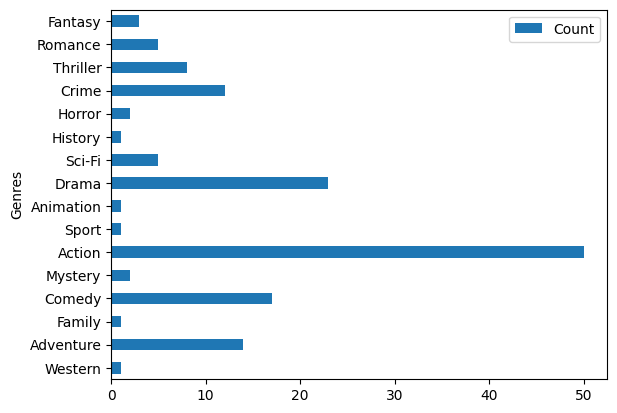

In [61]:
df_genre_count.plot(kind='barh')
plt.show()


In [62]:
# 3. Create a scatterplot of the movie ratings versus the number of
# votes using Pandas and Matplotlib to visualize the relationship
# between ratings and popularity.



In [63]:
ratings = soup.find_all('div', {'class': 'ratings-imdb-rating'})


In [64]:
ratings_list = []
for value in ratings:
    ratings_list.append(value.text.strip())


In [65]:
ratings_list


['5.7',
 '5.1',
 '6.9',
 '6.9',
 '7.6',
 '7.1',
 '6.1',
 '4.8',
 '5.6',
 '5.9',
 '6.8',
 '7.1',
 '7.7',
 '5.7',
 '5.4',
 '8.2',
 '5.2',
 '4.8',
 '6.0',
 '5.5',
 '8.0',
 '8.1',
 '6.2',
 '6.6',
 '3.8',
 '7.9',
 '3.5',
 '7.0',
 '7.1',
 '6.7',
 '5.9',
 '4.7',
 '6.5',
 '6.1',
 '5.2',
 '6.2',
 '5.6',
 '5.7',
 '5.6',
 '2.5',
 '5.7',
 '5.3',
 '5.6',
 '6.1',
 '6.8',
 '6.2',
 '6.9',
 '6.4',
 '7.4',
 '7.0']

In [66]:
df_top_titles['Ratings'] = ratings_list


In [67]:
df_top_titles


,Top_Titles,Genres,Ratings
0,Nowhere to Run(1993),"Action, Drama, Romance",5.7
1,Stormbreaker(2006),"Action, Adventure, Family",5.1
2,Muppet Treasure Island(1996),"Action, Adventure, Comedy",6.9
3,Agneepath(2012),"Action, Crime, Drama",6.9
4,Evangelion Shin Gekijôban: Jo(2007),"Animation, Action, Drama",7.6
5,Koi... Mil Gaya(2003),"Action, Drama, Romance",7.1
6,2.0(2018),"Action, Sci-Fi, Thriller",6.1
7,Crocodile Dundee in Los Angeles(2001),"Action, Adventure, Comedy",4.8
8,The Contract(2006),"Action, Crime, Drama",5.6
9,.Men at Work(1990),"Action, Comedy, Crime",5.9


In [68]:
df_top_titles.set_index('Top_Titles', inplace=True)


In [69]:
df_top_titles


,Genres,Ratings
Top_Titles,,
Nowhere to Run(1993),"Action, Drama, Romance",5.7
Stormbreaker(2006),"Action, Adventure, Family",5.1
Muppet Treasure Island(1996),"Action, Adventure, Comedy",6.9
Agneepath(2012),"Action, Crime, Drama",6.9
Evangelion Shin Gekijôban: Jo(2007),"Animation, Action, Drama",7.6
Koi... Mil Gaya(2003),"Action, Drama, Romance",7.1
2.0(2018),"Action, Sci-Fi, Thriller",6.1
Crocodile Dundee in Los Angeles(2001),"Action, Adventure, Comedy",4.8
The Contract(2006),"Action, Crime, Drama",5.6


In [70]:
votes = soup.find_all('span', {'name': 'nv'})


In [71]:
votes_list = []
for value in votes:
    v = str(value.text.strip().replace(',', ''))
    if v.isnumeric():
        votes_list.append(v)


In [72]:
df_votes_list = pd.DataFrame(votes_list)


In [73]:
df_votes_list['Titles'] = top_titles_list2


In [74]:
df_votes_list.set_index('Titles', inplace=True)


In [75]:
df_votes_list


,0
Titles,
Nowhere to Run(1993),25018
Stormbreaker(2006),25026
Muppet Treasure Island(1996),25044
Agneepath(2012),25175
Evangelion Shin Gekijôban: Jo(2007),25180
Koi... Mil Gaya(2003),25202
2.0(2018),25385
Crocodile Dundee in Los Angeles(2001),25411
The Contract(2006),25418


In [76]:
df_votes_list.rename(columns={0: 'Votes'}, inplace=True)


In [77]:
df_votes_list


,Votes
Titles,
Nowhere to Run(1993),25018
Stormbreaker(2006),25026
Muppet Treasure Island(1996),25044
Agneepath(2012),25175
Evangelion Shin Gekijôban: Jo(2007),25180
Koi... Mil Gaya(2003),25202
2.0(2018),25385
Crocodile Dundee in Los Angeles(2001),25411
The Contract(2006),25418


In [78]:
df_votes_list['Ratings'] = ratings_list


In [79]:
df_votes_list


,Votes,Ratings
Titles,,
Nowhere to Run(1993),25018,5.7
Stormbreaker(2006),25026,5.1
Muppet Treasure Island(1996),25044,6.9
Agneepath(2012),25175,6.9
Evangelion Shin Gekijôban: Jo(2007),25180,7.6
Koi... Mil Gaya(2003),25202,7.1
2.0(2018),25385,6.1
Crocodile Dundee in Los Angeles(2001),25411,4.8
The Contract(2006),25418,5.6


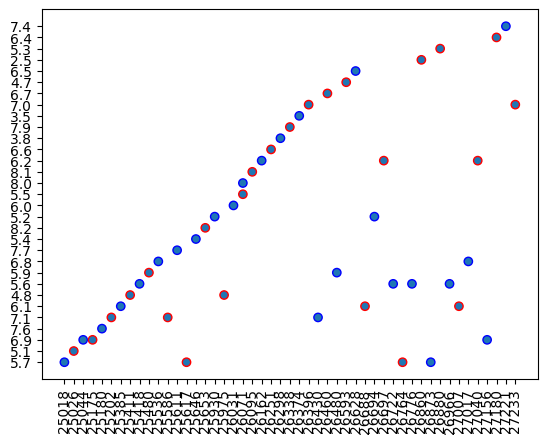

In [80]:
plt.scatter(df_votes_list.Votes, df_votes_list.Ratings, edgecolors=['blue', 'red'])
plt.xticks(rotation=90)
plt.show()
